In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1 Data cleaning
#2 EDA
#3 Text Processing
#4 Model Building
#5 Evaluation
#6 Improvement
#7 Website
#8 Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
#Renaming columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [10]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['Target']=encoder.fit_transform(df['Target'])

# Spam-1 Ham-0

In [13]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first',ignore_index=True)

In [17]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...
5165,0,Will Ì_ b going to esplanade fr home?
5166,0,"Pity, * was in mood for that. So...any other s..."
5167,0,The guy did some bitching but I acted like i'd...


In [18]:
df.shape

(5169, 2)

# 2.EDA

In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

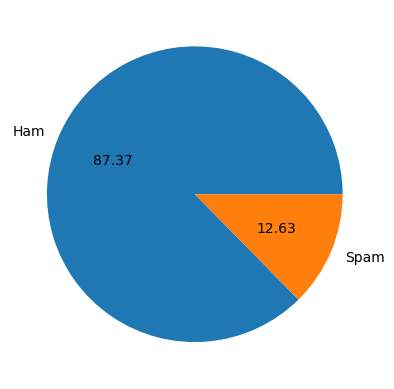

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [21]:
#Data is Imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MEGHANSH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters']=df['Text'].apply(len)

C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_21016\911280584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['Text'].apply(len)


In [25]:
df

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161
5165,0,Will Ì_ b going to esplanade fr home?,37
5166,0,"Pity, * was in mood for that. So...any other s...",57
5167,0,The guy did some bitching but I acted like i'd...,125


In [26]:
#num of words
df['num_words']  = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_21016\3408243359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']  = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [27]:
df

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,35
5165,0,Will Ì_ b going to esplanade fr home?,37,9
5166,0,"Pity, * was in mood for that. So...any other s...",57,15
5167,0,The guy did some bitching but I acted like i'd...,125,27


In [28]:
#num of words
df['num_sent']  = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_21016\1923410252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent']  = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [29]:
df

,Target,Text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5165,0,Will Ì_ b going to esplanade fr home?,37,9,1
5166,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5167,0,The guy did some bitching but I acted like i'd...,125,27,1


# 3 Data Preprocessing
<br>
1.Lowercase
<br>
2.Tokenization
<br>
3.Removing Special characters
<br>
4.Stopwords and punctuation
<br>
5.Stemming

In [30]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [31]:
ps=PorterStemmer()

In [32]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [33]:
Ham=df[df['Target']==0]

In [34]:
Spam=df[df['Target']==1]

In [35]:
df['transform_text']=df['Text'].apply(transform_text)

C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_21016\1562877658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']=df['Text'].apply(transform_text)


In [36]:
df

,Target,Text,num_characters,num_words,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5165,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5166,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5167,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [37]:
Spam=df[df['Target']==1]
Ham=df[df['Target']==0]

In [38]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [39]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [40]:
spam_wc=wc.generate(Spam['transform_text'].str.cat(sep=" "))

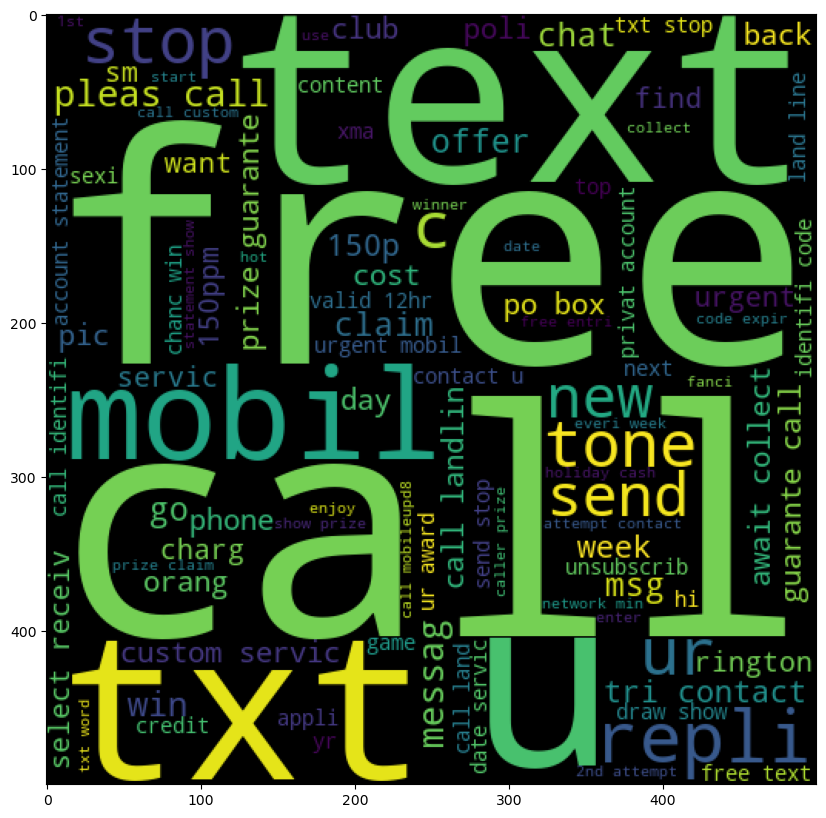

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [42]:
ham_wc=wc.generate(Ham['transform_text'].str.cat(sep=" "))

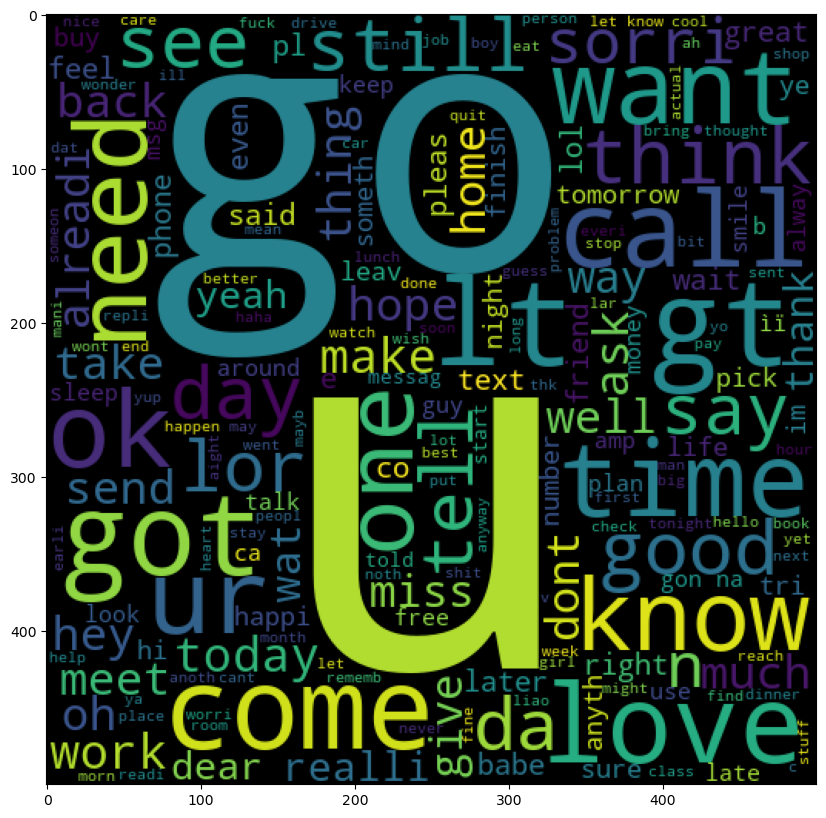

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

In [44]:
spam_corpus=[]
for msg in Spam['transform_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)


In [45]:
len(spam_corpus)

9939

In [46]:
from collections import Counter
spam_corpus_data=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [47]:
spam_corpus_data

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [48]:
import seaborn as sns

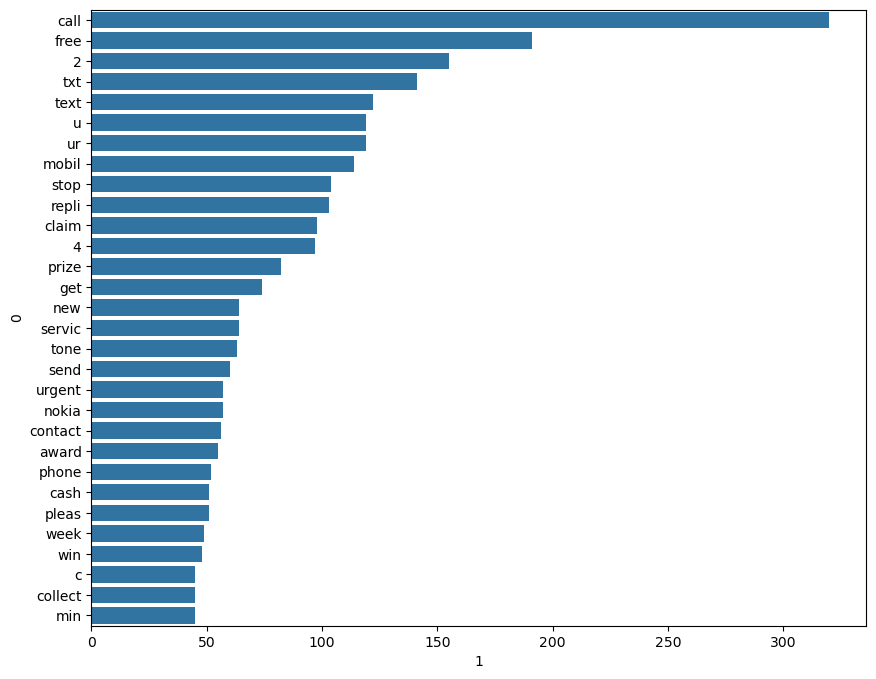

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(x=spam_corpus_data[1],y=spam_corpus_data[0])
plt.show()

In [50]:
ham_corpus=[]
for msg in Ham['transform_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)


In [51]:
ham_corpus_data=pd.DataFrame(Counter(ham_corpus).most_common(30))

In [52]:
ham_corpus_data

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


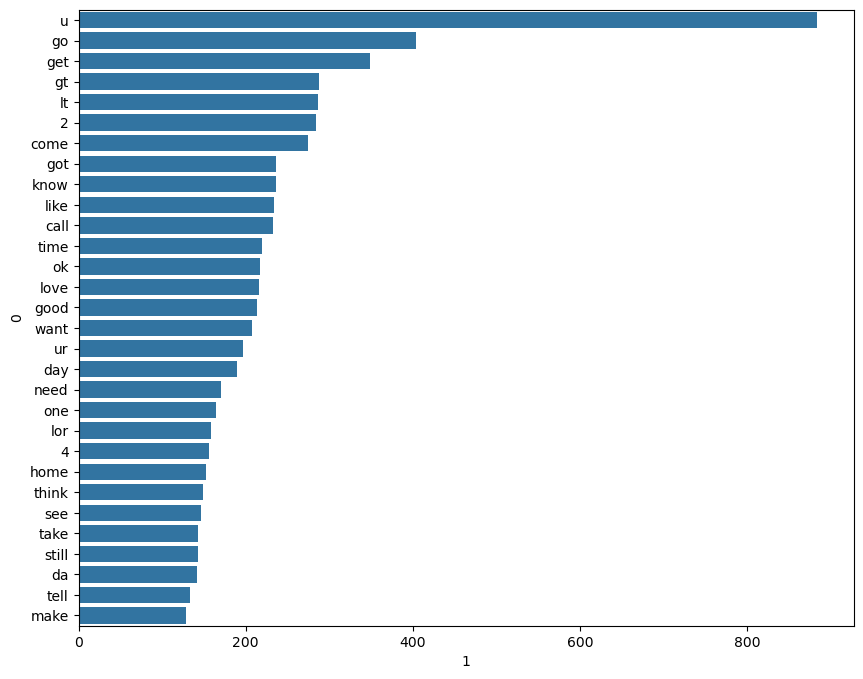

In [53]:
plt.figure(figsize=(10,8))
sns.barplot(x=ham_corpus_data[1],y=ham_corpus_data[0])
plt.show()

# 4 Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [55]:
X=cv.fit_transform(df['transform_text'])

In [56]:
X=X.toarray()

In [57]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
X.shape

(5169, 6708)

In [59]:
y=df['Target'].values

In [60]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [64]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [66]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [67]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


<h1>
Using TF-iDF
</h1>

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [69]:
X1=tfidf.fit_transform(df['transform_text'])

In [70]:
X1=X1.toarray()

In [71]:
y1=df['Target'].values

In [72]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=2)

In [73]:
gnb.fit(X1_train,y1_train)
y_pred_tfidf=gnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred_tfidf))
print(confusion_matrix(y1_test,y_pred_tfidf))
print(precision_score(y1_test,y_pred_tfidf))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [74]:
mnb.fit(X1_train,y1_train)
y_pred_tfidf_2=mnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred_tfidf_2))
print(confusion_matrix(y1_test,y_pred_tfidf_2))
print(precision_score(y1_test,y_pred_tfidf_2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [75]:
bnb.fit(X1_train,y1_train)
y_pred_tfidf_3=bnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred_tfidf_3))
print(confusion_matrix(y1_test,y_pred_tfidf_3))
print(precision_score(y1_test,y_pred_tfidf_3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


<h1>
Other Model performance
</h1>

In [76]:
pip install xgboost

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [79]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [81]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9245647969052224
Precision -  0.9166666666666666
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


f:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [82]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [83]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.924565,0.916667
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


<h2>
Changing Tf-iDF parameters to Max_features=3000
</h2>

In [84]:
tfidf2=TfidfVectorizer(max_features=3000)

In [85]:
X=tfidf2.fit_transform(df['transform_text'])

In [86]:
X=X.toarray()

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [88]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy_tfidf(3000) - ",current_accuracy)
    print("Precision_tfidf(3000) - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy_tfidf(3000) -  0.9758220502901354
Precision_tfidf(3000) -  0.9747899159663865
For  KN
Accuracy_tfidf(3000) -  0.9052224371373307
Precision_tfidf(3000) -  1.0
For  NB
Accuracy_tfidf(3000) -  0.9709864603481625
Precision_tfidf(3000) -  1.0
For  DT
Accuracy_tfidf(3000) -  0.9303675048355899
Precision_tfidf(3000) -  0.8173076923076923
For  LR
Accuracy_tfidf(3000) -  0.9584139264990329
Precision_tfidf(3000) -  0.9702970297029703
For  RF
Accuracy_tfidf(3000) -  0.9758220502901354
Precision_tfidf(3000) -  0.9829059829059829


f:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy_tfidf(3000) -  0.960348162475822
Precision_tfidf(3000) -  0.9292035398230089
For  BgC
Accuracy_tfidf(3000) -  0.9584139264990329
Precision_tfidf(3000) -  0.8682170542635659
For  ETC
Accuracy_tfidf(3000) -  0.9748549323017408
Precision_tfidf(3000) -  0.9745762711864406
For  GBDT
Accuracy_tfidf(3000) -  0.9468085106382979
Precision_tfidf(3000) -  0.9191919191919192
For  xgb
Accuracy_tfidf(3000) -  0.9671179883945842
Precision_tfidf(3000) -  0.9262295081967213


In [89]:
performance_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_tfidf(3000)':accuracy_scores,'Precision_tfidf(3000)':precision_scores}).sort_values('Precision_tfidf(3000)',ascending=False)

In [90]:
performance_df2

,Algorithm,Accuracy_tfidf(3000),Precision_tfidf(3000)
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [91]:
performance_merged_df = pd.merge(performance_df,performance_df2,on='Algorithm')

In [92]:
performance_merged_df

,Algorithm,Accuracy,Precision,Accuracy_tfidf(3000),Precision_tfidf(3000)
0,KN,0.906190,1.000000,0.905222,1.000000
1,RF,0.971954,1.000000,0.975822,0.982906
2,ETC,0.976789,0.991379,0.974855,0.974576
3,LR,0.970986,0.973684,0.958414,0.970297
4,xgb,0.973888,0.966387,0.967118,0.926230
5,AdaBoost,0.963250,0.946429,0.960348,0.929204
6,GBDT,0.943907,0.944444,0.946809,0.919192
7,DT,0.924565,0.916667,0.930368,0.817308
8,BgC,0.962282,0.915966,0.958414,0.868217
9,NB,0.964217,0.834437,0.970986,1.000000


In [93]:
y_pre=mnb.predict(X_test)
print(precision_score(y_test,y_pre))

1.0


In [94]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [95]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [96]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [97]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [98]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [99]:
from sklearn.ensemble import StackingClassifier

In [100]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [101]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [102]:
import pickle
pickle.dump(tfidf2,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))